# CME 193 - Lecture 6 - Pandas


1. HW 1 is due tonight at 11:59pm on Gradescope
  - 2 free late days 
2. HW 2 is coming today 
  - Uses pandas, scikit-learn, and scipy optimize
  - Very basic ML algorithm implementation

# Basic Section (Start)

## Pandas

[Pandas](https://pandas.pydata.org/) is a Python library for dealing with tabular data.  The main thing you'll hear people talk about is the DataFrame object (inspired by R), which is designed to hold tabular data.

## Difference between a DataFrame and NumPy Array

Pandas DataFrames and NumPy arrays both have similarities to Python lists.  
* Numpy arrays are designed to contain data of one type (e.g. Int, Float, ...)
* DataFrames can contain different types of data (Int, Float, String, ...)
    * Usually each column has the same type
    
    
Both arrays and DataFrames are optimized for storage/performance beyond Python lists

Pandas is also powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

## Key Features

* File I/O - integrations with multiple file formats
* Working with missing data (.dropna(), pd.isnull())
* Normal table operations: merging and joining, groupby functionality, reshaping via stack, and pivot_tables,
* Time series-specific functionality:
    * date range generation and frequency conversion, moving window statistics/regressions, date shifting and lagging, etc.
* Built in Matplotlib integration

## Other Strengths

* Strong community, support, and documentation
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

## Python/Pandas vs. R

* R is a language dedicated to statistics. Python is a general-purpose language with statistics modules.
* R has more statistical analysis features than Python, and specialized syntaxes.

However, when it comes to building complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical experiment, the richness of Python is an invaluable asset.

## Getting Started

[Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) is a link to the documentation for DataFrames

In [1]:
import pandas as pd
import numpy as np

## Objects and Basic Creation

| Name | Dimensions | Description  |
| ------:| -----------:|----------|
| ```pd.Series``` | 1 | 1D labeled homogeneously-typed array |
| ```pd.DataFrame```  | 2| General 2D labeled, size-mutable tabular structure |

# Series
## What are they?
- Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.
- Basic method to create a series:
```s = pd.Series(data, index = index) ```
- Data Can be many things:
    * An ndarray (or regular Python list)
    * A Python Dictionary
    * A scalar
- The passed index is a list of axis labels (which varies on what data is)

Think "Series = Vector + labels"

In [2]:
first_series = pd.Series([1,2,3,8,16,32,64])
print(type(first_series))
print(first_series)

<class 'pandas.core.series.Series'>
0     1
1     2
2     3
3     8
4    16
5    32
6    64
dtype: int64


In [3]:
first_series[2]

3

In [4]:
second_series = pd.Series([1,2,3,8,16,32,64],  index=[2,1,0,3,4,5,6])
print(type(second_series))
print(second_series)

<class 'pandas.core.series.Series'>
2     1
1     2
0     3
3     8
4    16
5    32
6    64
dtype: int64


In [5]:
second_series[2] #indexing by label

1

In [6]:
second_series.iloc[2] #indexing by position

3

`print` options: add formatting to the end of whatever you want to print

In [14]:
print("happy", end = ' ')
endstring = '\n'+'-'*50+'\n'
print('valentine\'s day', end = endstring)
print("<3")

happy valentine's day
--------------------------------------------------
<3


In [15]:
s = pd.Series(np.random.randn(5), index=['a', 'a', 'c', 'd', 'e'])
print(s, end = endstring)
print(s.index, end = endstring)
s['a']

a    0.514341
a    0.698448
c    1.178768
d    0.620256
e   -1.172206
dtype: float64
--------------------------------------------------
Index(['a', 'a', 'c', 'd', 'e'], dtype='object')
--------------------------------------------------


a    0.514341
a    0.698448
dtype: float64

In [16]:
s['e']

-1.1722056216157708

In [18]:
s.iloc[4]

-1.1722056216157708

If Data is a dictionary, the index will be constructed from the corresponding keys. If you specify an index, the values in the data corresponding to the given index keys/labels will be pulled out. 

In [19]:
d = {'a': [0., 0], 2: 2., 'b': {'1':1.}}
pd.Series(d)

a      [0.0, 0]
2           2.0
b    {'1': 1.0}
dtype: object

You can create a series from a scalar, but need to specify indices

In [22]:
pd.Series(5, index = np.arange(7))

0    5
1    5
2    5
3    5
4    5
5    5
6    5
dtype: int64

You can slice series like you would numpy arrays/python lists

In [23]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

a    0.282075
b   -0.896167
c   -0.817894
d    2.344126
e   -0.093918
dtype: float64


#### slicing

In [24]:
end_string = '\n' + '-'*50 + '\n'

# slicing
print(s.iloc[:3], end = end_string)

#alternate slicing, unlike all other slicing, including end. #.loc is equivalent to []
print(s['a':'c'], end = end_string)

a    0.282075
b   -0.896167
c   -0.817894
dtype: float64
--------------------------------------------------
a    0.282075
b   -0.896167
c   -0.817894
dtype: float64
--------------------------------------------------


#### conditional indexing

In [25]:
# conditional indexing
s > 0

a     True
b    False
c    False
d     True
e    False
dtype: bool

In [27]:
# conditional indexing - index with booleans
print(s[s > 0], end = end_string)

a    0.282075
d    2.344126
dtype: float64
--------------------------------------------------


In [28]:
# elementwise function - vectorization
print(np.exp(s), end = end_string)

a     1.325879
b     0.408131
c     0.441360
d    10.424158
e     0.910358
dtype: float64
--------------------------------------------------


### Series Attributes:

- Get the index :
`s.index`
- Get the values :
`s.values`
- Find the shape :`s.shape`


In [32]:
print(s.index)
print(s.values)
print(s.shape)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[ 0.28207546 -0.89616692 -0.81789399  2.34412601 -0.09391777]
(5,)



### Series Iteration
Calling `.items()` on a dictionary returns data pairs `(idx, val)`. An easy way to iterate over a dictionary:

In [34]:
for data_pair in s.items(): # for idx, val in s.items():
    idx, val = data_pair #(idx, val)
    print(idx, " -> ", val)
    print("-"*25)

a  ->  0.28207546048901005
-------------------------
b  ->  -0.8961669173822233
-------------------------
c  ->  -0.8178939873818939
-------------------------
d  ->  2.3441260129925183
-------------------------
e  ->  -0.09391776731930968
-------------------------


Sort by index or by value

In [35]:
print(s.sort_index(), end = end_string)

print(s.sort_values(), end = end_string)

a    0.282075
b   -0.896167
c   -0.817894
d    2.344126
e   -0.093918
dtype: float64
--------------------------------------------------
b   -0.896167
c   -0.817894
e   -0.093918
a    0.282075
d    2.344126
dtype: float64
--------------------------------------------------


Find counts of unique values

In [36]:
s = pd.Series([0,0,0,1,1,1,2,2,2,2])
sct = s.value_counts()
print(s, end = end_string)
print(sct)

0    0
1    0
2    0
3    1
4    1
5    1
6    2
7    2
8    2
9    2
dtype: int64
--------------------------------------------------
2    4
0    3
1    3
Name: count, dtype: int64


In [37]:
# Small Hack for Counter
from collections import Counter
Counter([0,0,0,1,1,1,2,2,2,2,3,2,3,3,3,])

Counter({2: 5, 3: 4, 0: 3, 1: 3})

You can do just about anything you can do with a numpy array

- Series.mean()
- Series.median()
- Series.mode()
- Series.nsmallest(num)
- Series.max ...

In [38]:
print(s.min(),end = end_string)
print(s.max(), end = end_string)

0
--------------------------------------------------
2
--------------------------------------------------


## Exercise (post-lecture)

- Consider the series `s` of letters in a sentence.
- What is count of each alphabetical letter in the sentence, output a series which is sorted by the count
- Create a list with only the top 5 common letters (not including space)  

HINT:   
1. `s.str.isalpha()` to check if a pd.series data is alphabetical  
2. `s.sort_values(ascending = False)` to sort value from largest to smallest

In [ ]:
s=pd.Series(list("Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the indexeeeeeee."))

In [ ]:
# YOUR CODE HERE

# Basic Section (End)

# DataFrame
- DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.
- You can create a DataFrame from:
    - Dict of 1D ndarrays, lists, dicts, or Series
    - 2-D numpy array
    - A list of dictionaries
    - Another Dataframe
``` python
df = pd.DataFrame(data, index = index, columns = columns)
```
- ```index```/ ``` columns ``` is a list of the row/ column labels. If you pass an index and/ or columns, you are guarenteeing the index and /or column of the df.
- If you do not pass anything in, the input will be constructed by "common sense" rules

[**pandas.DataFrame**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

# DataFrame Creation From dict of series or dicts
- The index of the resulting DataFrame will be the union of the indices of the various Series. If there are any nested dicts, these will be first converted to Series.
- If no columns are passed, the columns will be the sorted list of dict keys.

In [39]:
# Create a dictionary of series
# Columns are dictionary keys, indices and values obtained from series
a_series = pd.Series([1,2,3], index  = ['a', 'bb', 'c'])
b_series = pd.Series([0,1,2,3], index = ['a','b', 'c', 'd'])
a_series,b_series

(a     1
 bb    2
 c     3
 dtype: int64,
 a    0
 b    1
 c    2
 d    3
 dtype: int64)

In [46]:
d = {'one': a_series,
     'two': b_series}
df = pd.DataFrame(d)
# use NaN to fill in the missing value
# pandas convert all element to floating type
df

,one,two
a,1.0,0.0
b,NaN,1.0
bb,2.0,NaN
c,3.0,2.0
d,NaN,3.0


In [47]:
# Slicing
print(pd.DataFrame(d, index = ['d', 'b', 'a'], columns = ['one']))
print(end_string)

# If we are extracting non-existing data, that would be NaN
print(pd.DataFrame(d, index = ['d', 'b', 'a', 'x'], columns = ['two', 'x']))


#Q: what's the problem of this slicing method?

   one
d  NaN
b  NaN
a  1.0

--------------------------------------------------

   two    x
d  3.0  NaN
b  1.0  NaN
a  0.0  NaN
x  NaN  NaN


# From dict of ndarray / lists
- The ndarrays must all be the same length.
- If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [48]:
d = {'one' : [1., 2., 3., 4], 'two' : [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


# From a list of dicts

In [49]:
data = []
for i in range(10):
    data += [ {'Column' + str(j):np.random.randint(100) for j in range(5)} ]
    # dictionary comprehension!
data

[{'Column0': 45, 'Column1': 13, 'Column2': 47, 'Column3': 27, 'Column4': 15},
 {'Column0': 82, 'Column1': 70, 'Column2': 24, 'Column3': 32, 'Column4': 93},
 {'Column0': 85, 'Column1': 50, 'Column2': 80, 'Column3': 18, 'Column4': 69},
 {'Column0': 24, 'Column1': 72, 'Column2': 70, 'Column3': 30, 'Column4': 13},
 {'Column0': 6, 'Column1': 23, 'Column2': 85, 'Column3': 72, 'Column4': 85},
 {'Column0': 50, 'Column1': 8, 'Column2': 82, 'Column3': 93, 'Column4': 26},
 {'Column0': 25, 'Column1': 94, 'Column2': 75, 'Column3': 51, 'Column4': 66},
 {'Column0': 83, 'Column1': 97, 'Column2': 96, 'Column3': 31, 'Column4': 74},
 {'Column0': 22, 'Column1': 85, 'Column2': 24, 'Column3': 94, 'Column4': 1},
 {'Column0': 22, 'Column1': 81, 'Column2': 91, 'Column3': 89, 'Column4': 18}]

In [50]:
# Creation from a list of dicts
df = pd.DataFrame(data)
print(df)

   Column0  Column1  Column2  Column3  Column4
0       45       13       47       27       15
1       82       70       24       32       93
2       85       50       80       18       69
3       24       72       70       30       13
4        6       23       85       72       85
5       50        8       82       93       26
6       25       94       75       51       66
7       83       97       96       31       74
8       22       85       24       94        1
9       22       81       91       89       18


In [51]:
# Only certain columns
df = pd.DataFrame(data, columns = ['Column0', 'Column1'])
df

,Column0,Column1
0,45,13
1,82,70
2,85,50
3,24,72
4,6,23
5,50,8
6,25,94
7,83,97
8,22,85
9,22,81


In [52]:
df.head(6) #print the first few rows, default = 5

,Column0,Column1
0,45,13
1,82,70
2,85,50
3,24,72
4,6,23
5,50,8


## Attributes

- ``` df.index ``` : the row index of df
- ``` df.columns ``` : the columns of df
- ``` df.shape ``` : the shape of the df
- ``` df.values ``` : numpy array of values

In [53]:
list(df.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [54]:
df.columns

Index(['Column0', 'Column1'], dtype='object')

In [55]:
df.shape

(10, 2)

In [56]:
df.values

array([[45, 13],
       [82, 70],
       [85, 50],
       [24, 72],
       [ 6, 23],
       [50,  8],
       [25, 94],
       [83, 97],
       [22, 85],
       [22, 81]])

In [61]:
# Adding and accessing columns
d = {'one': pd.Series([1,2,3], index  = ['a', 'b', 'c']),
     'two': pd.Series(range(4), index = ['a','b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,0
b,2.0,1
c,3.0,2
d,NaN,3


In [62]:
# math operation, like how we create data in the dictionary
df['three'] =  df['one']*df['two']
# # Create a boolean flag column
df['flag'] = df['one'] > 2
# # Create a const column
df['const'] = 'const_value'

df

,one,two,three,flag,const
a,1.0,0,0.0,False,const_value
b,2.0,1,2.0,False,const_value
c,3.0,2,6.0,True,const_value
d,NaN,3,NaN,False,const_value


In [63]:
# inserting column in specified location index, with values
# insert at index 1, column named 'bar', with data df['two']
df.insert(1, 'bar', df['two'])
df

,one,bar,two,three,flag,const
a,1.0,0,0,0.0,False,const_value
b,2.0,1,1,2.0,False,const_value
c,3.0,2,2,6.0,True,const_value
d,NaN,3,3,NaN,False,const_value


In [64]:
# Deleting Columns  .pop()
three = df.pop('three')
df

,one,bar,two,flag,const
a,1.0,0,0,False,const_value
b,2.0,1,1,False,const_value
c,3.0,2,2,True,const_value
d,NaN,3,3,False,const_value


In [65]:
three

a    0.0
b    2.0
c    6.0
d    NaN
Name: three, dtype: float64

## Indexing and Selection

- 3 methods ``` [],  iloc, loc ```

| Operation  | Syntax       | Result |
|----|----------------------| ---------------------------|
| Select Column | df[col]   |    Series                      |
| Select Row by Label | df.loc[label] | Series  |
| Select Row by Integer Location | df.iloc[idx] |      Series                    |
| Slice rows | df[5:10]        |                        DataFrame  |
| Select rows by boolean | df[mask]   | DataFrame        |

- Note all the operations below are valid on series as well restricted to one dimension

## Selecting Cols form Of Indexing: []
- Series: selecting a label: `s[label]`
- DataFrame: selection single or multiple columns:
`df['col']` or `df[['col1', 'col2']]`
- DataFrame: slicing the rows:
`df['rowlabel1': 'rowlabel2']`
or
`df[boolean_mask]`

In [66]:
# Lets create a data frame
pd.options.display.max_rows = 4
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C','D'])
df

,A,B,C,D
2000-01-01,-2.121524,0.507054,-2.226815,-2.510802
2000-01-02,-2.092022,-0.133716,-1.861902,1.330017
...,...,...,...,...
2000-01-07,0.117608,-0.015148,0.998754,2.011301
2000-01-08,-0.082389,0.841889,0.320857,-0.026443


In [73]:
# column  'A'
df['A']

2000-01-01   -2.121524
2000-01-02   -2.092022
                ...   
2000-01-07    0.117608
2000-01-08   -0.082389
Freq: D, Name: A, Length: 8, dtype: float64

In [68]:
### You can also access a column by df.colname
df.A #same as df['A']

2000-01-01   -2.121524
2000-01-02   -2.092022
                ...   
2000-01-07    0.117608
2000-01-08   -0.082389
Freq: D, Name: A, Length: 8, dtype: float64

In [69]:
# multiple column
df[['A', 'B']]

,A,B
2000-01-01,-2.121524,0.507054
2000-01-02,-2.092022,-0.133716
...,...,...
2000-01-07,0.117608,-0.015148
2000-01-08,-0.082389,0.841889


In [70]:
df['A'] > df['B']

2000-01-01    False
2000-01-02    False
              ...  
2000-01-07     True
2000-01-08    False
Freq: D, Length: 8, dtype: bool

In [71]:
# boolean mask
df[df['A'] > df['B']]

,A,B,C,D
2000-01-06,0.841975,-0.677183,0.979898,0.586924
2000-01-07,0.117608,-0.015148,0.998754,2.011301


## Selecting rows by label .loc (Recommend)

- is primarily label based, but may also be used with a boolean array.
- .loc will raise KeyError when the items are not found
- Allowed inputs:
    1. A single label
    2. A list of labels
    3. A boolean array

In [74]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10)

In [75]:
df

,A,B,C,D
2000-01-01,-2.121524,0.507054,-2.226815,-2.510802
2000-01-02,-2.092022,-0.133716,-1.861902,1.330017
2000-01-03,-0.501943,-0.098445,0.591518,-1.661728
2000-01-04,-0.996519,-0.629037,-1.985133,0.053648
2000-01-05,-1.518193,-0.308139,-0.360917,-0.322763
2000-01-06,0.841975,-0.677183,0.979898,0.586924
2000-01-07,0.117608,-0.015148,0.998754,2.011301
2000-01-08,-0.082389,0.841889,0.320857,-0.026443


In [76]:
df.head()

,A,B,C,D
2000-01-01,-2.121524,0.507054,-2.226815,-2.510802
2000-01-02,-2.092022,-0.133716,-1.861902,1.330017
2000-01-03,-0.501943,-0.098445,0.591518,-1.661728
2000-01-04,-0.996519,-0.629037,-1.985133,0.053648
2000-01-05,-1.518193,-0.308139,-0.360917,-0.322763


In [77]:
## Selection by label .loc
df.loc['2000-01-01']

A   -2.121524
B    0.507054
C   -2.226815
D   -2.510802
Name: 2000-01-01 00:00:00, dtype: float64

In [78]:
## Selection by label .loc
df.loc['2000-01-01', 'A']

-2.1215236682640675

In [79]:
# similar to numpy slicing by using labels
df.loc['2000-01-01':'2000-01-03', 'A':'C']

,A,B,C
2000-01-01,-2.121524,0.507054,-2.226815
2000-01-02,-2.092022,-0.133716,-1.861902
2000-01-03,-0.501943,-0.098445,0.591518


In [80]:
df

,A,B,C,D
2000-01-01,-2.121524,0.507054,-2.226815,-2.510802
2000-01-02,-2.092022,-0.133716,-1.861902,1.330017
2000-01-03,-0.501943,-0.098445,0.591518,-1.661728
2000-01-04,-0.996519,-0.629037,-1.985133,0.053648
2000-01-05,-1.518193,-0.308139,-0.360917,-0.322763
2000-01-06,0.841975,-0.677183,0.979898,0.586924
2000-01-07,0.117608,-0.015148,0.998754,2.011301
2000-01-08,-0.082389,0.841889,0.320857,-0.026443


In [81]:
df.loc['2000-01-01'] > 0

A    False
B     True
C    False
D    False
Name: 2000-01-01 00:00:00, dtype: bool

In [82]:
# Get columns for which value is greater than 0 on certain day, get all rows
df.loc[:, df.loc['2000-01-01'] > 0]

,B
2000-01-01,0.507054
2000-01-02,-0.133716
2000-01-03,-0.098445
2000-01-04,-0.629037
2000-01-05,-0.308139
2000-01-06,-0.677183
2000-01-07,-0.015148
2000-01-08,0.841889


## Selecting rows by position

- The .iloc attribute is the primary access method. The following are valid input:
    - An integer
    - A list of integers
    - A slice
    - A boolean array

In [83]:
df1 = pd.DataFrame(np.random.randn(6,4),
                   index=list(range(0,12,2)), columns=list(range(0,12,3)))

df1

,0,3,6,9
0,-2.174920,0.539787,-1.709389,-1.169321
2,-0.613619,0.400946,-0.701363,-0.110230
4,-0.663391,-0.496492,0.207111,-0.223525
6,-1.129927,0.557471,-0.141310,-0.229843
8,1.167618,1.887855,-1.126263,2.084456
10,-0.563117,0.829874,-1.927859,0.451517


In [84]:
# rows 0-2
df1.loc[[0,2,4]]

,0,3,6,9
0,-2.174920,0.539787,-1.709389,-1.169321
2,-0.613619,0.400946,-0.701363,-0.110230
4,-0.663391,-0.496492,0.207111,-0.223525


In [85]:
# rows 0-2
df1.iloc[:3]

,0,3,6,9
0,-2.174920,0.539787,-1.709389,-1.169321
2,-0.613619,0.400946,-0.701363,-0.110230
4,-0.663391,-0.496492,0.207111,-0.223525


In [86]:
df1

,0,3,6,9
0,-2.174920,0.539787,-1.709389,-1.169321
2,-0.613619,0.400946,-0.701363,-0.110230
4,-0.663391,-0.496492,0.207111,-0.223525
6,-1.129927,0.557471,-0.141310,-0.229843
8,1.167618,1.887855,-1.126263,2.084456
10,-0.563117,0.829874,-1.927859,0.451517


In [87]:
#  rows 1:5  and columns 2 : 4
df1.iloc[1:5, 2:4]

,6,9
2,-0.701363,-0.110230
4,0.207111,-0.223525
6,-0.141310,-0.229843
8,-1.126263,2.084456


In [88]:
# select via integer list
df1.iloc[[1,3,5], [1,3]]

,3,9
2,0.400946,-0.110230
6,0.557471,-0.229843
10,0.829874,0.451517


In [89]:
df1

,0,3,6,9
0,-2.174920,0.539787,-1.709389,-1.169321
2,-0.613619,0.400946,-0.701363,-0.110230
4,-0.663391,-0.496492,0.207111,-0.223525
6,-1.129927,0.557471,-0.141310,-0.229843
8,1.167618,1.887855,-1.126263,2.084456
10,-0.563117,0.829874,-1.927859,0.451517


In [90]:
df1.iloc[:, 1]

0     0.539787
2     0.400946
4    -0.496492
6     0.557471
8     1.887855
10    0.829874
Name: 3, dtype: float64

In [92]:
# selecting via integer mask
boolean_mask = df1.iloc[:, 1] > 0
print(boolean_mask.values)

df1.iloc[boolean_mask.values,:]

[ True  True False  True  True  True]


,0,3,6,9
0,-2.174920,0.539787,-1.709389,-1.169321
2,-0.613619,0.400946,-0.701363,-0.110230
6,-1.129927,0.557471,-0.141310,-0.229843
8,1.167618,1.887855,-1.126263,2.084456
10,-0.563117,0.829874,-1.927859,0.451517


### Exercise （post-lecture)

Given the dataframe, find the following
- Last two rows of columns A and D
- Last three rows such which statisfy that column A > Column B

In [ ]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C','D'])
df

In [ ]:
# YOUR SOLUTION HERE

# Merging DataFrames

- Pandas has full-featured, very high performance, in memory join operations that are very similar to SQL and R

- The documentation is https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging

- Pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects:
``` python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True) ```


The sequence of operations in a basic call to `pd.merge()` is:

1. Check all columns in `left` and `right`. Let S be the set of columns which are present in both
2. For every row of `left`, check if it has a corresponding row in `right` with the same values among the columns in S.
3. If two matching rows are found, merge the rows together in the natural way.

The `how` parameter determines how Pandas will deal with the rows that don't match.

In [105]:
# Example of merge
left = pd.DataFrame({'key': ['henry', 'graham'], 'lval_uid': [10, 11]})
right = pd.DataFrame({'key': ['henry', 'john'], 'rval_score': [60, 90]})

print("left: ",left,"right: ",right, sep=end_string)

left: 
--------------------------------------------------
      key  lval_uid
0   henry        10
1  graham        11
--------------------------------------------------
right: 
--------------------------------------------------
     key  rval_score
0  henry          60
1   john          90


In [106]:
merged = pd.merge(left, right, on=['key'], how="inner")
print(merged)
#inner ignores all rows in left which don't have a match in right (and vice versa)

     key  lval_uid  rval_score
0  henry        10          60


In [96]:
merged = pd.merge(left, right, on=['key'], how="outer")
print(merged)
#outer keeps all rows which don't have a match, filling missing entries with NaN

      key  lval_uid  rval_score
0   henry      10.0        60.0
1  graham      11.0         NaN
2    john       NaN        90.0


In [97]:
merged = pd.merge(left, right,  on=['key'], how="left")
print(merged)
#left keeps all rows in `left` if they don't have a match, but ignores rows in right if they don't match

      key  lval_uid  rval_score
0   henry        10        60.0
1  graham        11         NaN


In [98]:
merged = pd.merge(left, right,  on=['key'], how="right")
print(merged)
#right does the same thing as left but on the `right` df

     key  lval_uid  rval_score
0  henry      10.0          60
1   john       NaN          90


`on_left` and `on_right` lets us merge based on columns which have different names in `left` and `right` (they need to be of the same type though)

## Execrise
Take a guess what would be the output here, and run the cell to validate your guess.

In [112]:
left = pd.DataFrame({'key': ['test', 'test'], 'lval': [4, 2]})
print(left, end = end_string)
right = pd.DataFrame({'key': ['test', 'test'], 'rval': [3, 5]})
print(right, end = end_string)
print(pd.merge(left,right, on = ['key']), end=end_string)

    key  lval
0  test     4
1  test     2
--------------------------------------------------
    key  rval
0  test     3
1  test     5
--------------------------------------------------
    key  lval  rval
0  test     4     3
1  test     4     5
2  test     2     3
3  test     2     5
--------------------------------------------------


## Function Application
 - Row or Column-wise Function Application: Applies function along input axis of DataFrame
```python
df.apply(func, axis = 0)
```
- apply() is used to apply a function along an axis of the DataFrame or on values of Series.
- applymap() is used to apply a function to a DataFrame elementwise.
- map() is used to substitute each value in a Series with another value.

In [113]:
## APPLY EXAMPLES
df1 = pd.DataFrame(np.ones([6,4])*np.array([1,2,3,4]), index=list(range(0,12,2)), columns=list('abcd'))
df1

,a,b,c,d
0,1.0,2.0,3.0,4.0
2,1.0,2.0,3.0,4.0
4,1.0,2.0,3.0,4.0
6,1.0,2.0,3.0,4.0
8,1.0,2.0,3.0,4.0
10,1.0,2.0,3.0,4.0


In [114]:
# Apply to each column
df1.apply(np.sum, axis = 0)

a     6.0
b    12.0
c    18.0
d    24.0
dtype: float64

In [115]:
# Apply to each row
df1.apply(np.sum, axis = 1)

0     10.0
2     10.0
4     10.0
6     10.0
8     10.0
10    10.0
dtype: float64

### Side note: lambda(anonymous) functions

lambda functions allow you to specify a function without giving it a separate declaration.  For example, the function
```python
lambda x: (x - x.mean())/x.std()
```
is equivalent to the function
```python
def normalize(x):
    return (x - x.mean())/x.std()
```
You'll often see lambda functions used in list comprehensions, or in methods (like `map()`, `apply()`, or `applymap()`) that take a function as input.

In [116]:
df1

,a,b,c,d
0,1.0,2.0,3.0,4.0
2,1.0,2.0,3.0,4.0
4,1.0,2.0,3.0,4.0
6,1.0,2.0,3.0,4.0
8,1.0,2.0,3.0,4.0
10,1.0,2.0,3.0,4.0


In [117]:
def add_sum(x):
    return x + x.sum()
df1.apply(add_sum, axis = 0)

,a,b,c,d
0,7.0,14.0,21.0,28.0
2,7.0,14.0,21.0,28.0
4,7.0,14.0,21.0,28.0
6,7.0,14.0,21.0,28.0
8,7.0,14.0,21.0,28.0
10,7.0,14.0,21.0,28.0


In [118]:
# # Use lambda functions  to normalize columns
df1.apply(lambda x: x + x.sum(), axis = 0)

,a,b,c,d
0,7.0,14.0,21.0,28.0
2,7.0,14.0,21.0,28.0
4,7.0,14.0,21.0,28.0
6,7.0,14.0,21.0,28.0
8,7.0,14.0,21.0,28.0
10,7.0,14.0,21.0,28.0


In [119]:
l1 = [-1,2,3,4,5,62,8,1,-1]
l2 = [(1,2),(3,4),(-1,4),(4,6),(10,1)]

In [120]:
sorted(l1)

[-1, -1, 1, 2, 3, 4, 5, 8, 62]

In [121]:
sorted(l2, key = lambda x: x[1])

[(10, 1), (1, 2), (3, 4), (-1, 4), (4, 6)]

## Exercise:
Say I wanted to find where the maximum dates occured for each column of the df. How can we do that?  
HINT: `.idxmax()` function for `pd.Series`

In [122]:
## APPLY EXAMPLES CONT
# Create DF with 1000 rows and 3 columns filled with random entries
tsdf = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'],
                    index=pd.date_range('1/1/2000', periods=1000))

tsdf

,A,B,C
2000-01-01,0.613040,-0.006958,-0.196480
2000-01-02,-0.119040,1.981378,-0.402345
2000-01-03,-2.309459,1.004119,-1.420442
2000-01-04,0.702569,-0.757207,-1.324377
2000-01-05,0.857074,0.359226,0.525984
...,...,...,...
2002-09-22,-0.957322,0.077362,1.155728
2002-09-23,-0.810880,-1.648908,0.324848
2002-09-24,0.579752,-1.176081,-0.287115
2002-09-25,1.175139,-0.759122,1.169488


In [123]:
# YOUR SOLUTION HERE

A   2000-03-02
B   2002-07-12
C   2001-03-23
dtype: datetime64[ns]

# I/O Functions

- There are loads of input output features. The highlights most useful to you are likely:
    - ``` pd.read_csv ``` / ``` pd.to_csv ```
    - ``` pd.read_excel ``` / ``` pd.to_excel ```
    - ``` pd.read_sql ``` / ``` pd.to_sql ```
    - ``` pd.read_pickle ``` / ``` pd.to_pickle ```
Documentation:

* [Pandas Import-Output Functions](https://pandas.pydata.org/pandas-docs/stable/io.html)

### Loading data from CSV
Here are the first several lines of `iris.csv`:

```
sepal_length,sepal_width,petal_length,petal_width,name
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
```

In [124]:
import pandas as pd
# Can use df.info to find out information about the df
iris_data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [125]:
#iris_data = pd.read_csv('./data/iris.csv')
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [126]:
# describe and stats summarize the dataframe
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## The split/apply combo (groupyby)
- pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names:
- Syntax:  
    - ``` groups = df.groupby(key) ```
    - ``` groups = df.groupby(key, axis = 1) ```
    - ``` groups = df.groupby([key1, key2], axis = 1) ```


- The group by concept is that we want to apply the same function on subsets of the dataframe, based on some key we use to split the DataFrame into subsets
- This idea is referred to as the "split-apply-combine" operation:
    - Split the data into groups based on some criteria
    - Apply a function to each group independently
    - Combine the results

![image](https://i.stack.imgur.com/sgCn1.jpg)

In [127]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [128]:
g = df.groupby('key')
g

In [129]:
g.agg(['min'])

,data
,min
key,
A,0
B,5
C,10


In [130]:
g.agg(['max','sum'])

data    
     max sum
key         
A     10  15
B     15  30
C     20  45

In [131]:
sums = df.groupby('key').agg(['min', 'max', 'sum'])
sums

data        
     min max sum
key             
A      0  10  15
B      5  15  30
C     10  20  45

In [132]:
customize = df.groupby('key').apply(lambda x: x.sum() + 0.1)
customize

,data
key,
A,15.1
B,30.1
C,45.1


# Plotting data : [Chart visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) (Optional)

- The plot method on Series and DataFrame is just a wrapper on matplotlib plt.plot()
- Many available plots:
    - ‘bar’ or ‘barh’ for bar plots
    - ‘hist’ for histogram
    - ‘box’ for boxplot
    - ‘kde’ or 'density' for density plots • ‘area’ for area plots
    - ‘scatter’ for scatter plots
    - ‘hexbin’ for hexagonal bin plots • ‘pie’ for pie plots
    
- There are several more complex plotting functions in pandas.tools.plotting that take a Series or DataFrame as an argument. These include:
    - Scatter matrices
    - Autocorrelation
    - Bootstrap Plot

In [133]:
import matplotlib.pyplot as plt

In [134]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


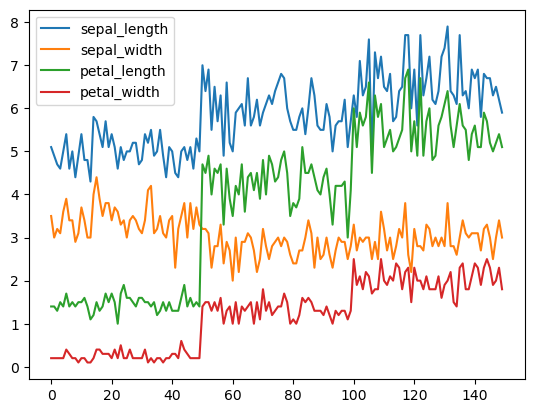

In [135]:
iris_data.plot(); #plot all the numeric data

                    A          B          C          D
2000-01-01  -0.787817  -0.277987   0.337194  -0.576485
2000-01-02  -0.193419  -0.382973  -1.403998   2.101826
2000-01-03  -0.699435   0.347048  -0.998492   3.244836
2000-01-04  -1.982839  -0.457881  -1.580632   1.980887
2000-01-05  -2.409809  -1.155307  -1.500085   0.902221
...               ...        ...        ...        ...
2002-09-22 -28.296207  37.197977 -56.695362 -79.481179
2002-09-23 -28.935289  36.089882 -56.240363 -78.893877
2002-09-24 -28.100013  36.089090 -56.201866 -77.881913
2002-09-25 -27.163973  35.663569 -54.435032 -78.846905
2002-09-26 -28.539241  35.678211 -54.063453 -76.778002

[1000 rows x 4 columns]


<Axes: >

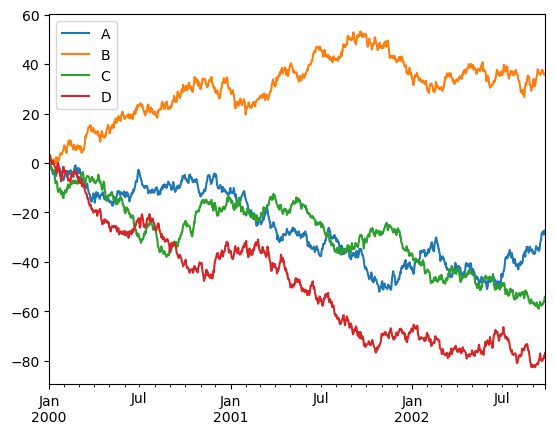

In [136]:
## Quick example - Random walks
df = pd.DataFrame(np.random.randn(1000, 4),
                  index =pd.date_range('1/1/2000', periods=1000),
                  columns=list('ABCD'))
df = df.cumsum()
print(df)
df.plot()

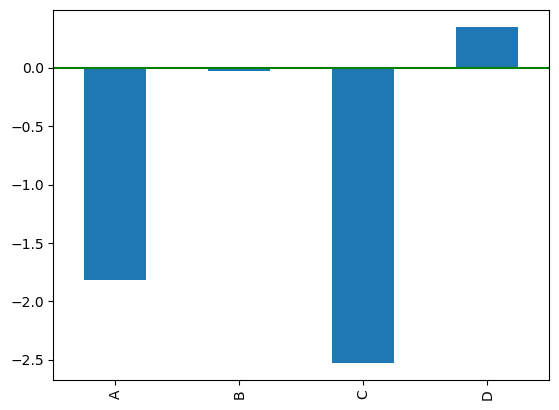

In [137]:
plt.figure()
df.iloc[5].plot(kind = 'bar')
plt.axhline(0, color = 'g')

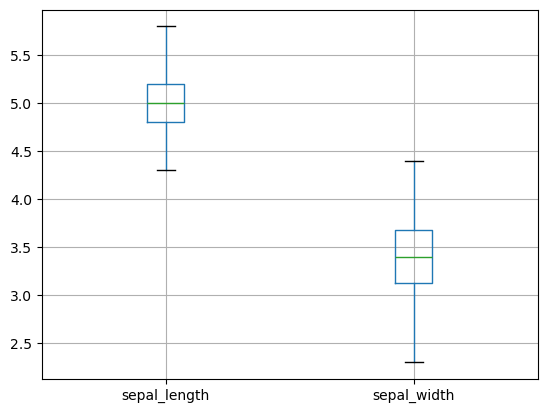

In [138]:
#data = pd.read_csv('./data/iris.csv')
ax = iris_data.groupby('species') \
         .get_group('setosa') \
         .boxplot(column=["sepal_length","sepal_width"], return_type='axes')